<a href="https://colab.research.google.com/github/Sonia-Mokhtari/Iris-Project/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary packages and loading the dataset
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from google.colab import files

# Load the uploaded Iris dataset
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Read the CSV file into a DataFrame named 'iris_df'
iris_df = pd.read_csv(file_name)

# Display the first few rows
print(iris_df.head())

Saving iris.csv to iris (1).csv
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
# Checking for missing values
iris_df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
# Check the data types of all columns
print(iris_df.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [ ]:
# Data type conversion
# Convert 'species' to categorical if not already
iris_df['species'] = iris_df['species'].astype('category')

In [ ]:
iris_df.shape

(150, 5)

In [ ]:
# Removing duplicates
iris_df = iris_df.drop_duplicates()

In [ ]:
iris_df.shape

(147, 5)

In [ ]:
iris_df['species'].value_counts()

,count
species,
versicolor,50
virginica,49
setosa,48


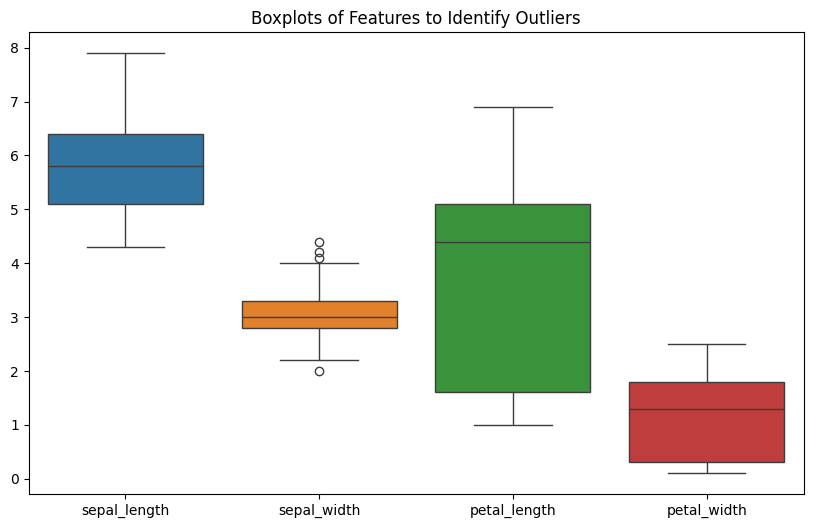

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting box plots for each feature to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
plt.title("Boxplots of Features to Identify Outliers")
plt.show()


In [ ]:
#  Handling outliers
# Calculate Q1, Q3, and IQR for each feature
Q1 = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].quantile(0.25)
Q3 = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify and count outliers
outliers = ((iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] < lower_bound) |
            (iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] > upper_bound))
outliers_count = outliers.sum()
print("Outliers in each column:\n", outliers_count)

# Step 4: Capping values using the calculated lower and upper bounds
iris_df_capped = iris_df.copy()

# Clip each feature in the dataset
for column in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    iris_df_capped[column] = iris_df_capped[column].clip(lower=lower_bound[column], upper=upper_bound[column])

# Display the capped DataFrame
print(iris_df_capped.head())


Outliers in each column:
 sepal_length    0
sepal_width     4
petal_length    0
petal_width     0
dtype: int64
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
# Exclude non-numeric columns (e.g., species column)
numeric_iris_df = iris_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_iris_df.corr()

# Display the correlation matrix
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109321      0.871305     0.817058
sepal_width      -0.109321     1.000000     -0.421057    -0.356376
petal_length      0.871305    -0.421057      1.000000     0.961883
petal_width       0.817058    -0.356376      0.961883     1.000000


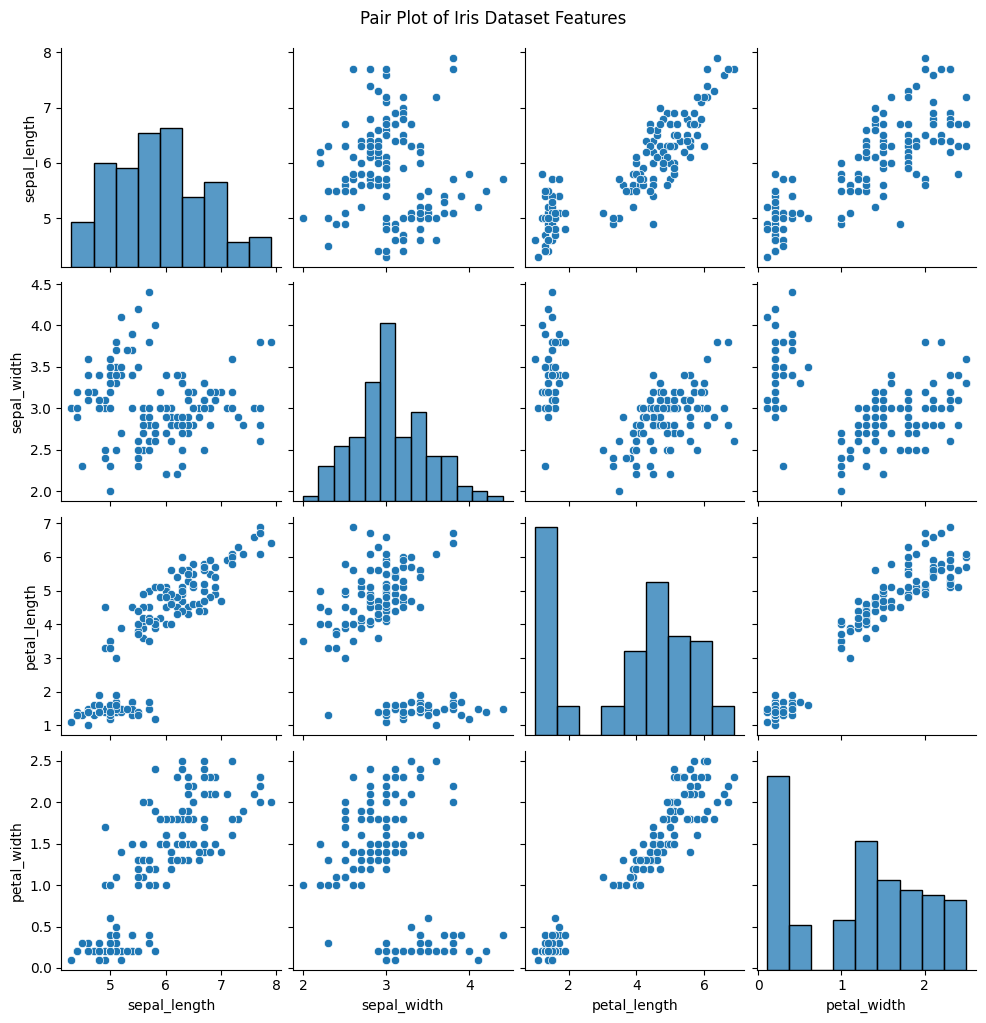

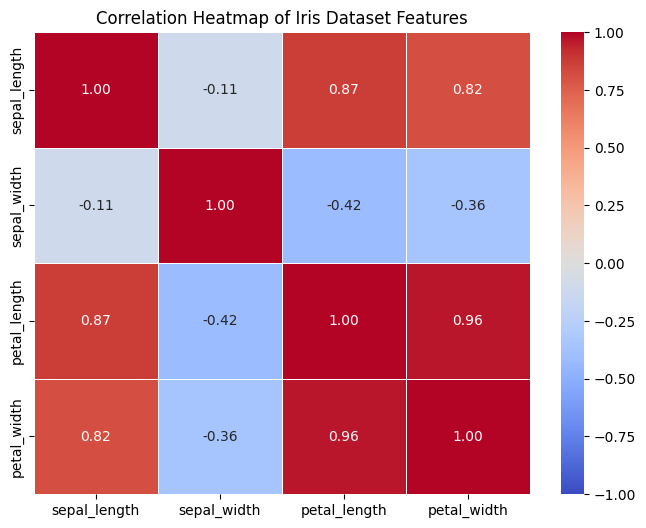

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot to visualize the relationships between all features
sns.pairplot(iris_df)
plt.suptitle("Pair Plot of Iris Dataset Features", y=1.02)
plt.show()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Iris Dataset Features')
plt.show()

In [ ]:
# Remove the 'sepal_length' and 'petal_length' features
iris_df = iris_df.drop(columns=['sepal_length', 'petal_length'], axis=1)
iris_df.head()

,sepal_width,petal_width,species
0,3.5,0.2,setosa
1,3.0,0.2,setosa
2,3.2,0.2,setosa
3,3.1,0.2,setosa
4,3.6,0.2,setosa


In [ ]:
# Standardization/Normalization
scaler = MinMaxScaler()
iris_df[['sepal_width','petal_width']] = scaler.fit_transform(
    iris_df[['sepal_width', 'petal_width']]
)
iris_df.head()

,sepal_width,petal_width,species
0,0.625000,0.041667,setosa
1,0.416667,0.041667,setosa
2,0.500000,0.041667,setosa
3,0.458333,0.041667,setosa
4,0.666667,0.041667,setosa


In [ ]:
# Filter out the species for each type
setosa = iris_df[iris_df['species'] == 'setosa']
versicolor = iris_df[iris_df['species'] == 'versicolor']
virginica = iris_df[iris_df['species'] == 'virginica']

# Function to generate imbalanced dataset
def generate_imbalanced_data(versicolor_samples, ratio_versicolor, ratio_virginica, ratio_setosa):
    # Calculate total dataset size based on the desired proportion of versicolor
    total_samples = int(versicolor_samples / ratio_versicolor)

    # Calculate how many samples to select from each species
    vir_samples = int(total_samples * ratio_virginica)
    setosa_samples = int(total_samples * ratio_setosa)

    # Sample the datasets
    setosa_imb = setosa.sample(setosa_samples, random_state=42)
    virginica_imb = virginica.sample(vir_samples, random_state=42)

    # Concatenate them into the final imbalanced dataset
    imbalanced_data = pd.concat([setosa_imb, versicolor, virginica_imb])

    return imbalanced_data

# 1. Slightly Imbalanced (50:30:20)
slightly_imbalanced = generate_imbalanced_data(50, 0.5, 0.3, 0.2)

# 2. Moderately Imbalanced (70:20:10)
moderately_imbalanced = generate_imbalanced_data(50, 0.7, 0.2, 0.1)

# 3. Severely Imbalanced (85:10:5)
severely_imbalanced = generate_imbalanced_data(50, 0.85, 0.1, 0.05)

# Check the class distribution in the imbalanced datasets
print("Slightly Imbalanced Class Distribution:")
print(slightly_imbalanced['species'].value_counts())

print("\nModerately Imbalanced Class Distribution:")
print(moderately_imbalanced['species'].value_counts())

print("\nSeverely Imbalanced Class Distribution:")
print(severely_imbalanced['species'].value_counts())


Slightly Imbalanced Class Distribution:
species
versicolor    50
virginica     30
setosa        20
Name: count, dtype: int64

Moderately Imbalanced Class Distribution:
species
versicolor    50
virginica     14
setosa         7
Name: count, dtype: int64

Severely Imbalanced Class Distribution:
species
versicolor    50
virginica      5
setosa         2
Name: count, dtype: int64


In [ ]:
slightly_imbalanced.shape

(100, 3)

In [ ]:
moderately_imbalanced.shape

(71, 3)

In [ ]:
severely_imbalanced.shape

(57, 3)

In [ ]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'species' column
slightly_imbalanced_df = slightly_imbalanced.copy()

# Encode the 'species' column
slightly_imbalanced_df['species'] = label_encoder.fit_transform(slightly_imbalanced_df['species'])

# Verify the result
print(slightly_imbalanced_df.head(10))

    sepal_width  petal_width  species
27     0.625000     0.041667        0
42     0.500000     0.041667        0
26     0.583333     0.125000        0
45     0.416667     0.083333        0
24     0.583333     0.041667        0
39     0.583333     0.041667        0
12     0.416667     0.000000        0
19     0.750000     0.083333        0
4      0.666667     0.041667        0
25     0.416667     0.041667        0


In [ ]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'species' column
moderately_imbalanced_df = moderately_imbalanced.copy()

# Encode the 'species' column
moderately_imbalanced_df['species'] = label_encoder.fit_transform(moderately_imbalanced_df['species'])

# Verify the result
print(moderately_imbalanced_df.head(10))


    sepal_width  petal_width  species
27     0.625000     0.041667        0
42     0.500000     0.041667        0
26     0.583333     0.125000        0
45     0.416667     0.083333        0
24     0.583333     0.041667        0
39     0.583333     0.041667        0
12     0.416667     0.000000        0
50     0.500000     0.541667        1
51     0.500000     0.583333        1
52     0.458333     0.583333        1


In [ ]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'species' column
severely_imbalanced_df = severely_imbalanced.copy()

# Encode the 'species' column
severely_imbalanced_df['species'] = label_encoder.fit_transform(severely_imbalanced_df['species'])

# Verify the result
print(severely_imbalanced_df.head(10))

    sepal_width  petal_width  species
27     0.625000     0.041667        0
42     0.500000     0.041667        0
50     0.500000     0.541667        1
51     0.500000     0.583333        1
52     0.458333     0.583333        1
53     0.125000     0.500000        1
54     0.333333     0.583333        1
55     0.333333     0.500000        1
56     0.541667     0.625000        1
57     0.166667     0.375000        1


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'slightly_imbalanced_df_df' is preprocessed dataset
# Features (sepal_width, petal_width) and target (species)
X = slightly_imbalanced_df[['sepal_width', 'petal_width']]  # Selecting feature columns
y = slightly_imbalanced_df['species']  # Target variable

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"Accuracy for {name}: {accuracy:.2f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred, zero_division=1)}\n")
    results[name] = accuracy

# Print overall results
print("Model Accuracy Comparison:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.2f}")

Training Logistic Regression...
Accuracy for Logistic Regression: 0.77
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.72      0.87      0.79        15
           2       0.67      0.44      0.53         9

    accuracy                           0.77        30
   macro avg       0.80      0.77      0.77        30
weighted avg       0.76      0.77      0.75        30


Training Random Forest...
Accuracy for Random Forest: 0.90
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.93      0.87      0.90        15
           2       0.80      0.89      0.84         9

    accuracy                           0.90        30
   macro avg       0.91      0.92      0.91        30
weighted avg       0.90      0.90      0.90        30


Training Decision 

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'moderately_imbalanced_df' is preprocessed dataset
# Features (sepal_width, petal_width) and target (species)
X = moderately_imbalanced_df[['sepal_width', 'petal_width']]  # Selecting feature columns
y = moderately_imbalanced_df['species']  # Target variable

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"Accuracy for {name}: {accuracy:.2f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred, zero_division=1)}\n")
    results[name] = accuracy

# Print overall results
print("Model Accuracy Comparison:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.2f}")


Training Logistic Regression...
Accuracy for Logistic Regression: 0.73
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.73      1.00      0.84        16
           2       1.00      0.00      0.00         4

    accuracy                           0.73        22
   macro avg       0.91      0.33      0.28        22
weighted avg       0.80      0.73      0.61        22


Training Random Forest...
Accuracy for Random Forest: 0.77
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.87      0.81      0.84        16
           2       0.57      1.00      0.73         4

    accuracy                           0.77        22
   macro avg       0.81      0.60      0.52        22
weighted avg       0.83      0.77      0.74        22


Training Decision 

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'severely_imbalanced_df' is preprocessed dataset
# Features (sepal_width, petal_width) and target (species)
X = severely_imbalanced_df[['sepal_width', 'petal_width']]  # Selecting feature columns
y = severely_imbalanced_df['species']  # Target variable

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"Accuracy for {name}: {accuracy:.2f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred, zero_division=1)}\n")
    results[name] = accuracy

# Print overall results
print("Model Accuracy Comparison:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.2f}")


Training Logistic Regression...
Accuracy for Logistic Regression: 0.89
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.89      1.00      0.94        16
           2       1.00      0.00      0.00         1

    accuracy                           0.89        18
   macro avg       0.96      0.33      0.31        18
weighted avg       0.90      0.89      0.84        18


Training Random Forest...
Accuracy for Random Forest: 1.00
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


Training Decision 

In [ ]:
import pandas as pd

def train_and_evaluate_models(dataset, dataset_name):
    X = dataset[['sepal_width', 'petal_width']]  # Selecting feature columns
    y = dataset['species']  # Target variable

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    models = {
        'Logistic Regression': LogisticRegression(max_iter=200),
        'Random Forest': RandomForestClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'SVM': SVC()
    }

    results = {}
    classification_reports = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=1)
        results[name] = accuracy
        classification_reports[name] = report

    return dataset_name, results, classification_reports

# Running evaluation on all datasets
datasets = {
    'Slightly Imbalanced': slightly_imbalanced_df,
    'Moderately Imbalanced': moderately_imbalanced_df,
    'Severely Imbalanced': severely_imbalanced_df
}

all_results = {}
all_classification_reports = {}

for dataset_name, dataset in datasets.items():
    name, results, reports = train_and_evaluate_models(dataset, dataset_name)
    all_results[name] = results
    all_classification_reports[name] = reports

# Convert results to DataFrame for comparison
df_results = pd.DataFrame(all_results)
print("\nModel Accuracy Comparison across Datasets:")
print(df_results)

# Print classification reports for detailed analysis
for dataset, reports in all_classification_reports.items():
    print(f"\nClassification Reports for {dataset}:")
    for model, report in reports.items():
        print(f"\n{model}:")
        print(report)



Model Accuracy Comparison across Datasets:
                     Slightly Imbalanced  Moderately Imbalanced  \
Logistic Regression             0.766667               0.727273   
Random Forest                   0.900000               0.772727   
Decision Tree                   0.900000               0.863636   
SVM                             0.866667               0.909091   

                     Severely Imbalanced  
Logistic Regression             0.888889  
Random Forest                   1.000000  
Decision Tree                   1.000000  
SVM                             1.000000  

Classification Reports for Slightly Imbalanced:

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.72      0.87      0.79        15
           2       0.67      0.44      0.53         9

    accuracy                           0.77        30
   macro avg       0.80      0.77      0.77        30
weighted

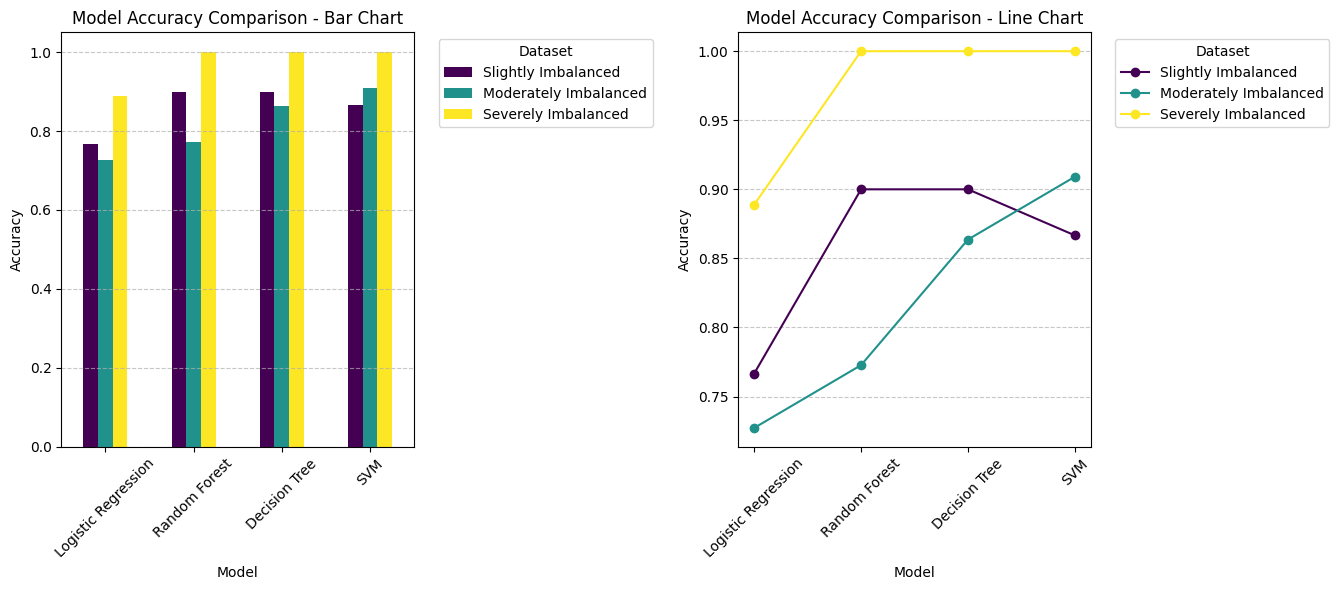

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming results from previous code are stored in 'all_results' dictionary
df_results = pd.DataFrame(all_results)

# Create subplots for bar and line charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
df_results.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title('Model Accuracy Comparison - Bar Chart')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticklabels(df_results.index, rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

# Line chart
df_results.plot(marker='o', ax=axes[1], colormap='viridis')
axes[1].set_title('Model Accuracy Comparison - Line Chart')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Accuracy')
axes[1].set_xticks(range(len(df_results.index)))
axes[1].set_xticklabels(df_results.index, rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to fit legends
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, ClusterCentroids
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

# Assuming 'slightly_imbalanced_df' is your preprocessed dataset
X = slightly_imbalanced_df[['sepal_width', 'petal_width']]  # Selecting feature columns
y = slightly_imbalanced_df['species']  # Target variable

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define models to test
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced"),
    "SVM": SVC(random_state=42, class_weight="balanced")
}

# Set k_neighbors for SMOTE and Borderline-SMOTE
neighbors = 3

# Define imbalance techniques to test
imbalance_methods = {
    "Original Data": None,
    f"SMOTE (k_neighbors={neighbors})": SMOTE(random_state=42, k_neighbors=neighbors),
    f"Random Oversampling": RandomOverSampler(random_state=42),
    f"Borderline-SMOTE (k_neighbors={neighbors})": BorderlineSMOTE(random_state=42, k_neighbors=neighbors),
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "Tomek Links": TomekLinks(),
    "Cluster Centroids": ClusterCentroids(random_state=42),
    "NearMiss": NearMiss(version=1)
}

# Function for comparing imbalance handling methods
def compare_imbalance_methods(X, y, random_state=42):
    results = {}

    for method_name, sampler in imbalance_methods.items():
        print(f"\nEvaluating Imbalance Handling Method: {method_name}")

        if method_name == "Original Data":
            X_resampled, y_resampled = X_train, y_train
        elif sampler:
            X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        else:
            X_resampled, y_resampled = X_train, y_train

        for model_name, model in models.items():
            model.fit(X_resampled, y_resampled)

            # Predict on the test set
            y_pred = model.predict(X_test)

            # Evaluate the model
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
            confusion = confusion_matrix(y_test, y_pred)

            # Store the results
            results[(method_name, model_name)] = {
                "Accuracy": accuracy,
                "Classification Report": report,
                "Confusion Matrix": confusion
            }

            # Print summary
            print(f"\nModel: {model_name}")
            print(f"Accuracy: {accuracy:.4f}")
            print("Classification Report:")
            print(classification_report(y_test, y_pred, zero_division=0))
            print("Confusion Matrix:")
            print(confusion)

    return results

# Call the function with example data
results = compare_imbalance_methods(X, y)



Evaluating Imbalance Handling Method: Original Data

Model: Logistic Regression
Accuracy: 0.6333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.70      0.47      0.56        15
           2       0.43      0.67      0.52         9

    accuracy                           0.63        30
   macro avg       0.71      0.71      0.69        30
weighted avg       0.68      0.63      0.64        30

Confusion Matrix:
[[6 0 0]
 [0 7 8]
 [0 3 6]]

Model: Decision Tree
Accuracy: 0.9000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.93      0.87      0.90        15
           2       0.80      0.89      0.84         9

    accuracy                           0.90        30
   macro avg       0.91      0.92      0.91        30
weighted avg       0.90      0.90      0.90        30

Confusion

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, ClusterCentroids
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

# Assuming 'moderately_imbalanced_df' is preprocessed dataset
X = moderately_imbalanced_df[['sepal_width', 'petal_width']]  # Selecting feature columns
y = moderately_imbalanced_df['species']  # Target variable

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define models to test
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced"),
    "SVM": SVC(random_state=42, class_weight="balanced")
}

# Set k_neighbors for SMOTE and Borderline-SMOTE
neighbors = 3

# Define imbalance techniques to test
imbalance_methods = {
    "Original Data": None,
    f"SMOTE (k_neighbors={neighbors})": SMOTE(random_state=42, k_neighbors=neighbors),
    f"Random Oversampling": RandomOverSampler(random_state=42),
    f"Borderline-SMOTE (k_neighbors={neighbors})": BorderlineSMOTE(random_state=42, k_neighbors=neighbors),
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "Tomek Links": TomekLinks(),
    "Cluster Centroids": ClusterCentroids(random_state=42),
    "NearMiss": NearMiss(version=1)
}

# Function for comparing imbalance handling methods
def compare_imbalance_methods(X, y, random_state=42):
    results = {}

    for method_name, sampler in imbalance_methods.items():
        print(f"\nEvaluating Imbalance Handling Method: {method_name}")

        if method_name == "Original Data":
            X_resampled, y_resampled = X_train, y_train
        elif sampler:
            X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        else:
            X_resampled, y_resampled = X_train, y_train

        for model_name, model in models.items():
            model.fit(X_resampled, y_resampled)

            # Predict on the test set
            y_pred = model.predict(X_test)

            # Evaluate the model
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
            confusion = confusion_matrix(y_test, y_pred)

            # Store the results
            results[(method_name, model_name)] = {
                "Accuracy": accuracy,
                "Classification Report": report,
                "Confusion Matrix": confusion
            }

            # Print summary
            print(f"\nModel: {model_name}")
            print(f"Accuracy: {accuracy:.4f}")
            print("Classification Report:")
            print(classification_report(y_test, y_pred, zero_division=0))
            print("Confusion Matrix:")
            print(confusion)

    return results

# Call the function with example data
results = compare_imbalance_methods(X, y)



Evaluating Imbalance Handling Method: Original Data

Model: Logistic Regression
Accuracy: 0.8182
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.75      0.86        16
           2       0.50      1.00      0.67         4

    accuracy                           0.82        22
   macro avg       0.83      0.92      0.84        22
weighted avg       0.91      0.82      0.84        22

Confusion Matrix:
[[ 2  0  0]
 [ 0 12  4]
 [ 0  0  4]]

Model: Decision Tree
Accuracy: 0.8636
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.81      0.90        16
           2       0.57      1.00      0.73         4

    accuracy                           0.86        22
   macro avg       0.86      0.94      0.87        22
weighted avg       0.92      0.86      0.88        22



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, ClusterCentroids
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

# Assuming 'severely_imbalanced_df' is preprocessed dataset
X = severely_imbalanced_df[['sepal_width', 'petal_width']]  # Selecting feature columns
y = severely_imbalanced_df['species']  # Target variable

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define models to test
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced"),
    "SVM": SVC(random_state=42, class_weight="balanced")
}

# Define imbalance techniques to test
imbalance_methods = {
    "Original Data": None,
    f"Random Oversampling": RandomOverSampler(random_state=42),
    f"Borderline-SMOTE (k_neighbors={neighbors})": BorderlineSMOTE(random_state=42, k_neighbors= 3),
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "Tomek Links": TomekLinks(),
    "Cluster Centroids": ClusterCentroids(random_state=42),
    "NearMiss": NearMiss(version=1, n_neighbors=1)
}

# Function for comparing imbalance handling methods
def compare_imbalance_methods(X, y, random_state=42):
    results = {}

    for method_name, sampler in imbalance_methods.items():
        print(f"\nEvaluating Imbalance Handling Method: {method_name}")

        if method_name == "Original Data":
            X_resampled, y_resampled = X_train, y_train
        elif sampler:
            X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        else:
            X_resampled, y_resampled = X_train, y_train

        for model_name, model in models.items():
            model.fit(X_resampled, y_resampled)

            # Predict on the test set
            y_pred = model.predict(X_test)

            # Evaluate the model
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
            confusion = confusion_matrix(y_test, y_pred)

            # Store the results
            results[(method_name, model_name)] = {
                "Accuracy": accuracy,
                "Classification Report": report,
                "Confusion Matrix": confusion
            }

            # Print summary
            print(f"\nModel: {model_name}")
            print(f"Accuracy: {accuracy:.4f}")
            print("Classification Report:")
            print(classification_report(y_test, y_pred, zero_division=0))
            print("Confusion Matrix:")
            print(confusion)

    return results

# Call the function with example data
results = compare_imbalance_methods(X, y)



Evaluating Imbalance Handling Method: Original Data

Model: Logistic Regression
Accuracy: 0.7222
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.69      0.81        16
           2       0.17      1.00      0.29         1

    accuracy                           0.72        18
   macro avg       0.72      0.90      0.70        18
weighted avg       0.95      0.72      0.80        18

Confusion Matrix:
[[ 1  0  0]
 [ 0 11  5]
 [ 0  0  1]]

Model: Decision Tree
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



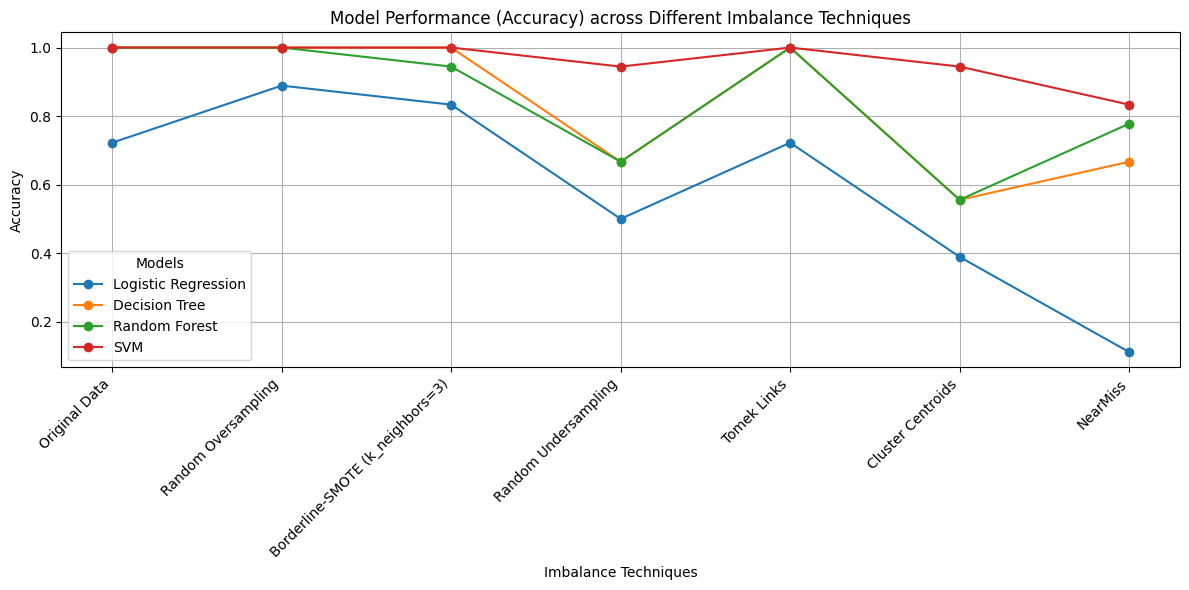

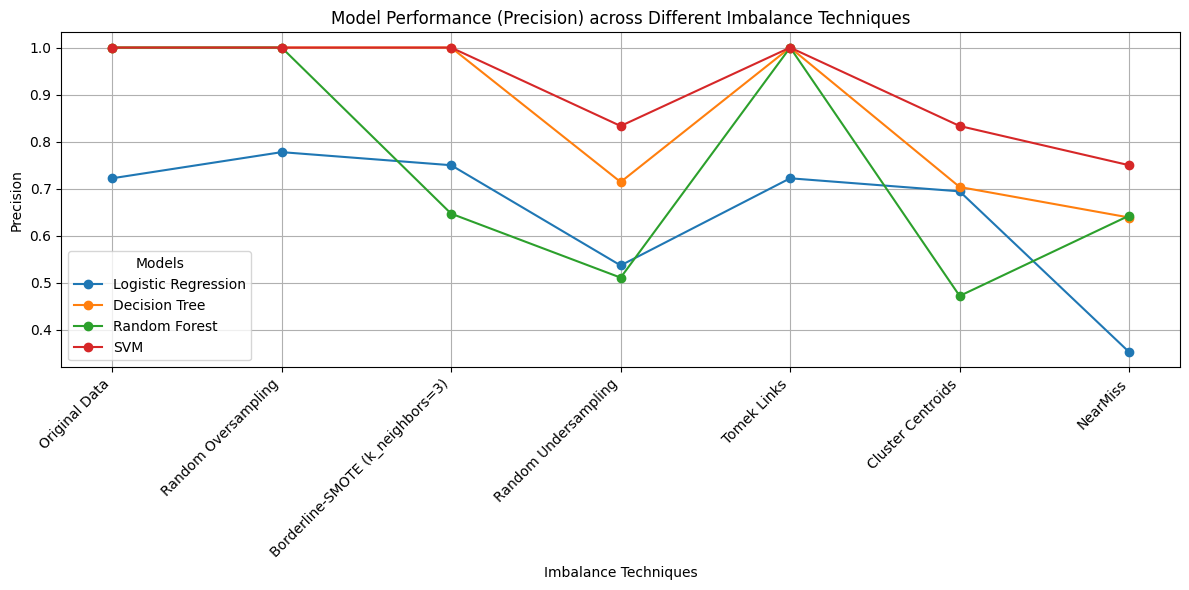

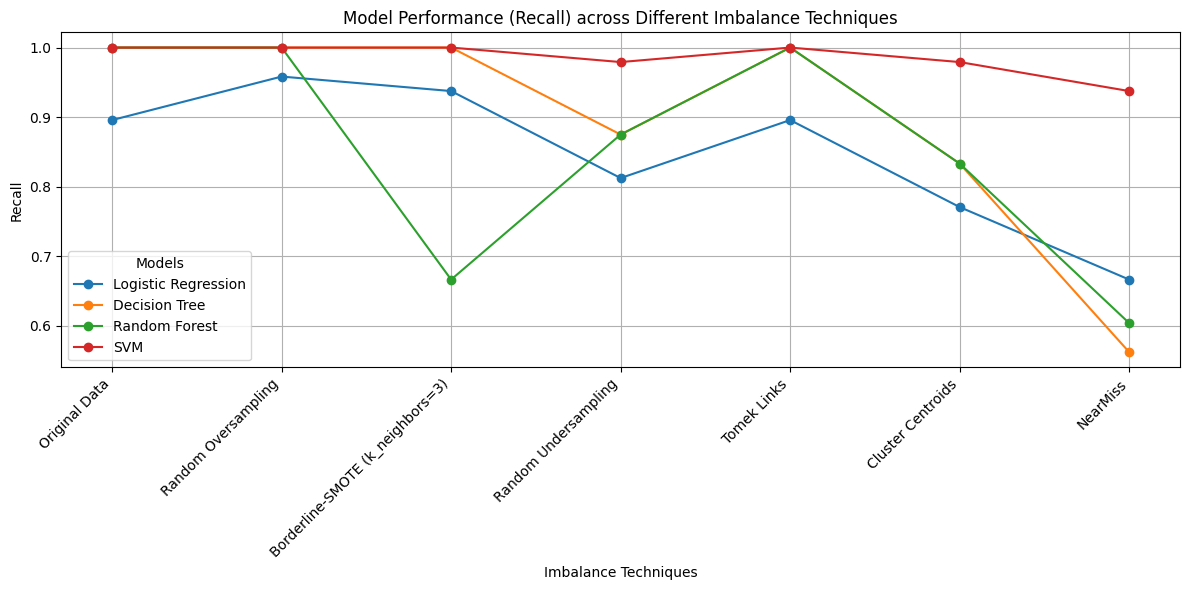

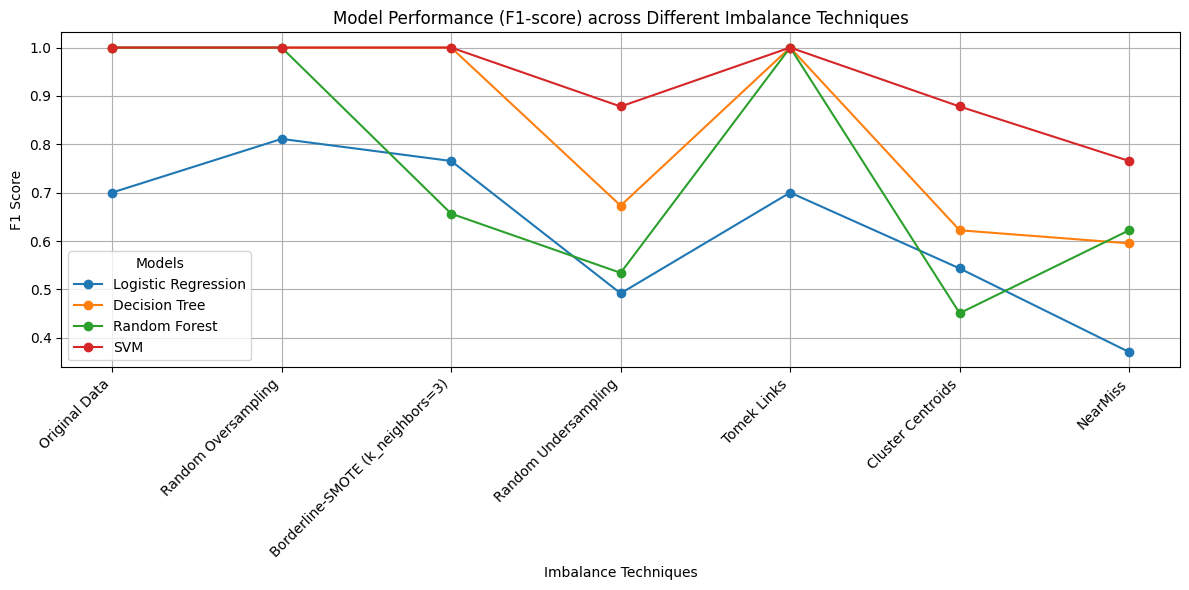

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define evaluation metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

# Create dictionaries to store metric values for each model and imbalance technique
metric_data = {metric: {model_name: [] for model_name in models.keys()} for metric in metrics}

# Loop over each imbalance method and model to extract metrics
for method_name in imbalance_methods.keys():
    for model_name in models.keys():
        result = results.get((method_name, model_name), {})

        # Extract accuracy
        accuracy = result.get("Accuracy", 0)
        metric_data["Accuracy"][model_name].append(accuracy)

        # Extract precision, recall, and f1-score (taking macro avg for multi-class problems)
        report = result.get("Classification Report", {})
        macro_avg = report.get("macro avg", {"precision": 0, "recall": 0, "f1-score": 0})

        precision = macro_avg.get("precision", 0)
        recall = macro_avg.get("recall", 0)
        f1_score = macro_avg.get("f1-score", 0)

        metric_data["Precision"][model_name].append(precision)
        metric_data["Recall"][model_name].append(recall)
        metric_data["F1-score"][model_name].append(f1_score)

# Define x-axis positions (methods)
methods = list(imbalance_methods.keys())
x = np.arange(len(methods))

# Function to plot each metric
def plot_metric(metric_name, ylabel):
    plt.figure(figsize=(12, 6))

    for model_name, values in metric_data[metric_name].items():
        plt.plot(x, values, label=model_name, marker='o')

    # Customize the plot
    plt.xticks(x, methods, rotation=45, ha="right")
    plt.xlabel('Imbalance Techniques')
    plt.ylabel(ylabel)
    plt.title(f'Model Performance ({metric_name}) across Different Imbalance Techniques')
    plt.legend(title="Models")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot Accuracy, Precision, Recall, and F1-score separately
plot_metric("Accuracy", "Accuracy")
plot_metric("Precision", "Precision")
plot_metric("Recall", "Recall")
plot_metric("F1-score", "F1 Score")


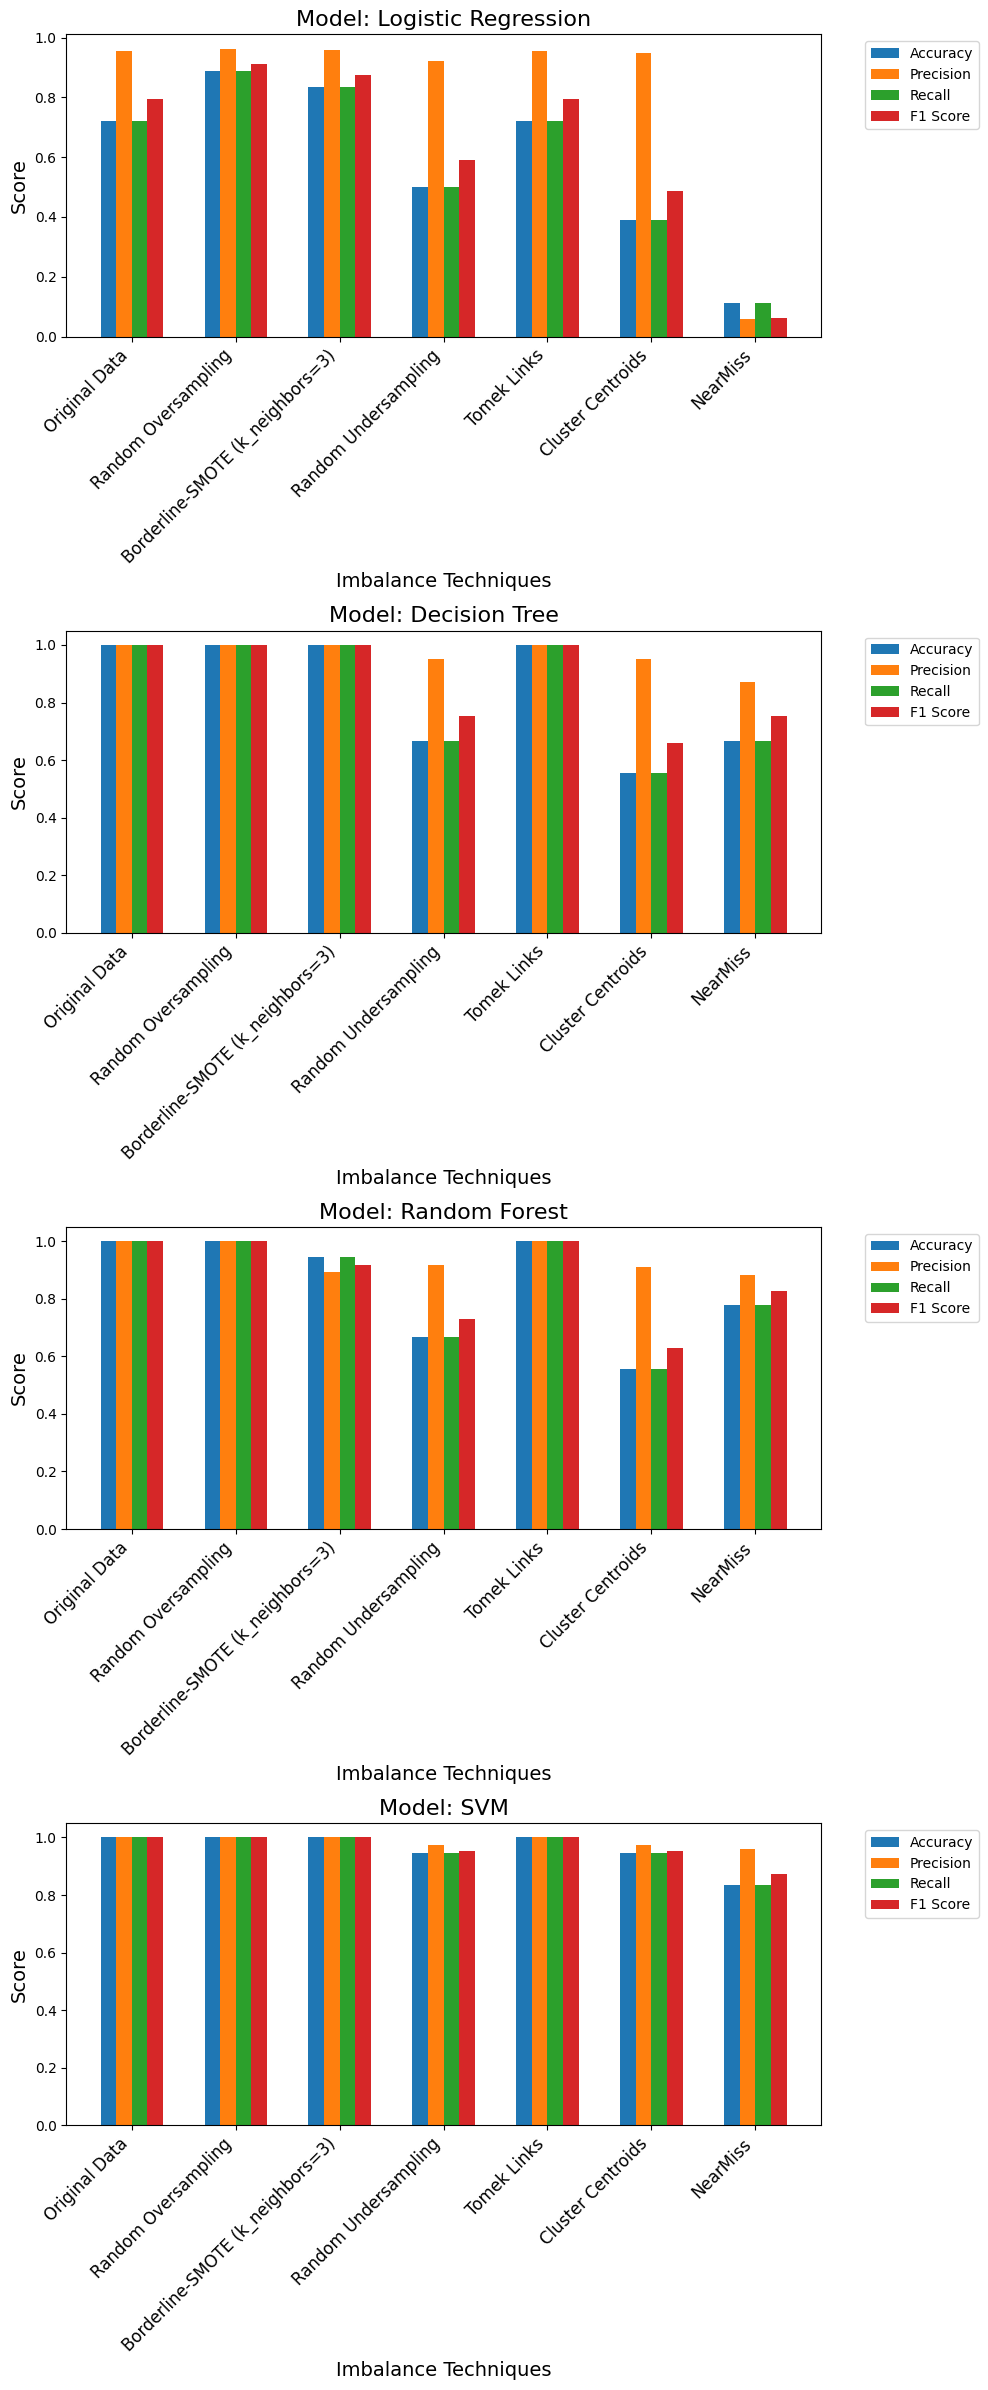

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'results' contains performance data (Accuracy, Precision, Recall, F1 Score)
performance_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Initialize a dictionary to hold performance metrics for each model and imbalance method
performance_data = {model_name: {method_name: {metric: 0 for metric in performance_metrics}
                                for method_name in imbalance_methods.keys()}
                    for model_name in models.keys()}

# Loop over each imbalance method and model and extract metrics
for method_name in imbalance_methods.keys():
    for model_name in models.keys():
        report = results.get((method_name, model_name), {}).get("Classification Report", {})

        # Extract performance metrics from the classification report
        accuracy = report.get("accuracy", 0)
        precision = report.get("weighted avg", {}).get("precision", 0)
        recall = report.get("weighted avg", {}).get("recall", 0)
        f1_score = report.get("weighted avg", {}).get("f1-score", 0)

        performance_data[model_name][method_name]['Accuracy'] = accuracy
        performance_data[model_name][method_name]['Precision'] = precision
        performance_data[model_name][method_name]['Recall'] = recall
        performance_data[model_name][method_name]['F1 Score'] = f1_score

# Prepare the bar chart function for comparison
def create_comparison_bar_chart(performance_data, models, performance_metrics, imbalance_methods):
    # Number of models and metrics
    num_metrics = len(performance_metrics)
    num_methods = len(imbalance_methods)

    # Create a subplot for each model
    fig, axes = plt.subplots(len(models), 1, figsize=(10, 6 * len(models)))

    # Ensure axes is iterable even if there's only one model
    if len(models) == 1:
        axes = [axes]

    # Define the bar width and positioning for each performance metric
    bar_width = 0.15
    index = np.arange(num_methods)

    # Loop through models and create a bar chart for each
    for i, (model_name, ax) in enumerate(zip(models.keys(), axes)):
        # For each model, plot bars for each performance metric and imbalance method
        for j, metric in enumerate(performance_metrics):
            metric_values = [performance_data[model_name][method].get(metric, 0) for method in imbalance_methods.keys()]
            ax.bar(index + j * bar_width, metric_values, bar_width, label=metric)

        # Set the x-ticks to the imbalance methods
        ax.set_xticks(index + bar_width * (num_metrics / 2 - 0.5))
        ax.set_xticklabels(imbalance_methods.keys(), rotation=45, ha="right", fontsize=12)

        # Set labels and title for each subplot (model)
        ax.set_xlabel("Imbalance Techniques", fontsize=14)
        ax.set_ylabel("Score", fontsize=14)
        ax.set_title(f"Model: {model_name}", fontsize=16)

        # Display the legend outside the chart for clarity
        ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

    # Adjust layout for readability
    plt.tight_layout()
    plt.show()

# Create a comparison bar chart for all models
create_comparison_bar_chart(performance_data, models, performance_metrics, imbalance_methods)
